In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

In [21]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [23]:
data=pd.read_csv('index.csv')
data

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
1128,2024-07-31,2024-07-31 20:53:35.077,card,ANON-0000-0000-0443,23.02,Cortado
1129,2024-07-31,2024-07-31 20:59:25.013,card,ANON-0000-0000-0040,27.92,Americano with Milk
1130,2024-07-31,2024-07-31 21:26:26.000,card,ANON-0000-0000-0444,32.82,Latte
1131,2024-07-31,2024-07-31 21:54:11.824,card,ANON-0000-0000-0445,32.82,Latte


In [8]:
data.isnull().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [9]:
data['card']

0       ANON-0000-0000-0001
1       ANON-0000-0000-0002
2       ANON-0000-0000-0002
3       ANON-0000-0000-0003
4       ANON-0000-0000-0004
               ...         
1128    ANON-0000-0000-0443
1129    ANON-0000-0000-0040
1130    ANON-0000-0000-0444
1131    ANON-0000-0000-0445
1132    ANON-0000-0000-0446
Name: card, Length: 1133, dtype: object

In [10]:
data.duplicated().sum()

0

In [11]:
frq_value_card = data['card'].mode()[0]
frq_value_card 

'ANON-0000-0000-0012'

In [12]:
data['card'].fillna(frq_value_card, inplace=True)


In [13]:
data.isnull().sum()

date           0
datetime       0
cash_type      0
card           0
money          0
coffee_name    0
dtype: int64

In [14]:
data.loc[:,['cash_type','card','coffee_name']].describe().T

,count,unique,top,freq
cash_type,1133,2,card,1044
card,1133,446,ANON-0000-0000-0012,177
coffee_name,1133,8,Americano with Milk,268


In [15]:
summary_stats = data[['money']].describe()
summary_stats

,money
count,1133.000000
mean,33.105808
std,5.035366
min,18.120000
25%,28.900000
50%,32.820000
75%,37.720000
max,40.000000


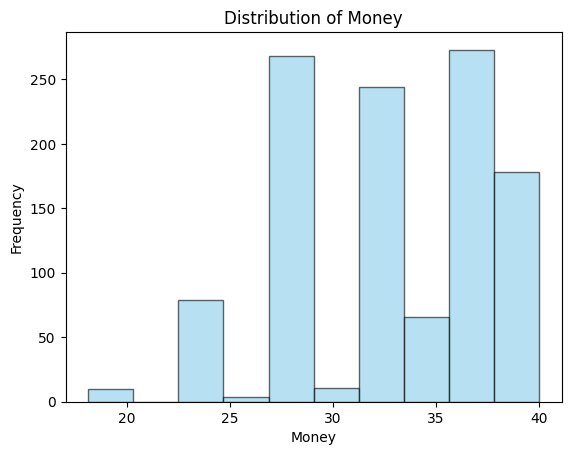

In [24]:
plt.hist(data['money'], bins=10, color='skyblue', edgecolor='black',alpha=0.6)
plt.xlabel('Money')
plt.ylabel('Frequency')
plt.title('Distribution of Money')
plt.show()


## observations:
35 to 40 --> high frequency of money


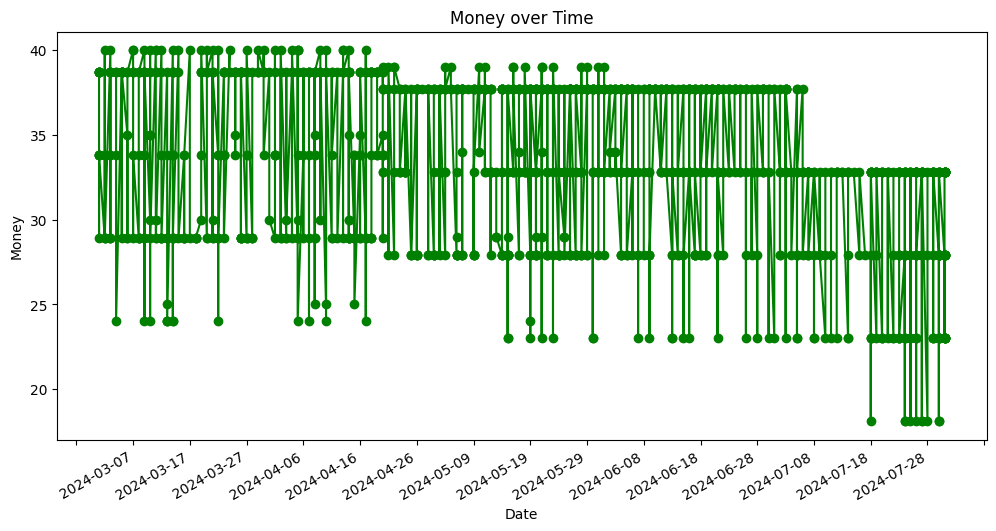

In [25]:
import matplotlib.dates as mdates

plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['money'], marker='o', color='green')

plt.xlabel('Date')
plt.ylabel('Money')
plt.title('Money over Time')

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))  # Shows every 10th day
plt.gcf().autofmt_xdate()  # Auto-format date labels to prevent overlap
plt.show()

## observations:
-approx dates
1. 07/03/24 to 16/04/24 --> high money income
2. 16/04/24 to 08/07/24 --> avg income
3. 08/07/24 to 28/07/24 --> low income


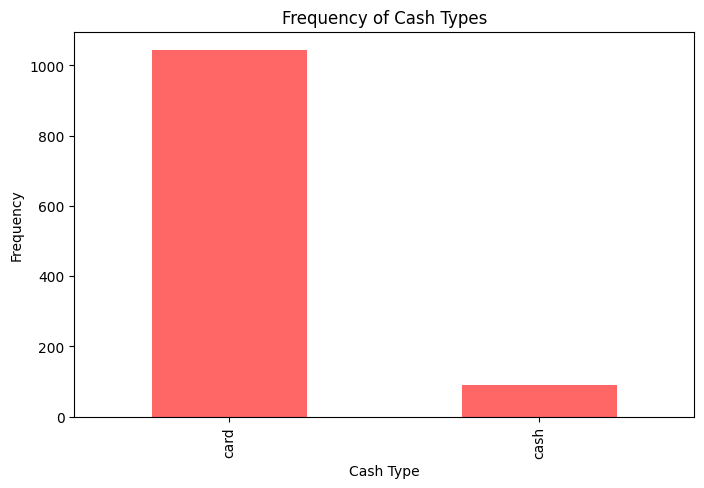

In [26]:
plt.figure(figsize=(8, 5))
data['cash_type'].value_counts().plot(kind='bar', color='red',alpha=0.6)
plt.xlabel('Cash Type')
plt.ylabel('Frequency')
plt.title('Frequency of Cash Types')
plt.show()

## observations:
1. payment using card is more than cash

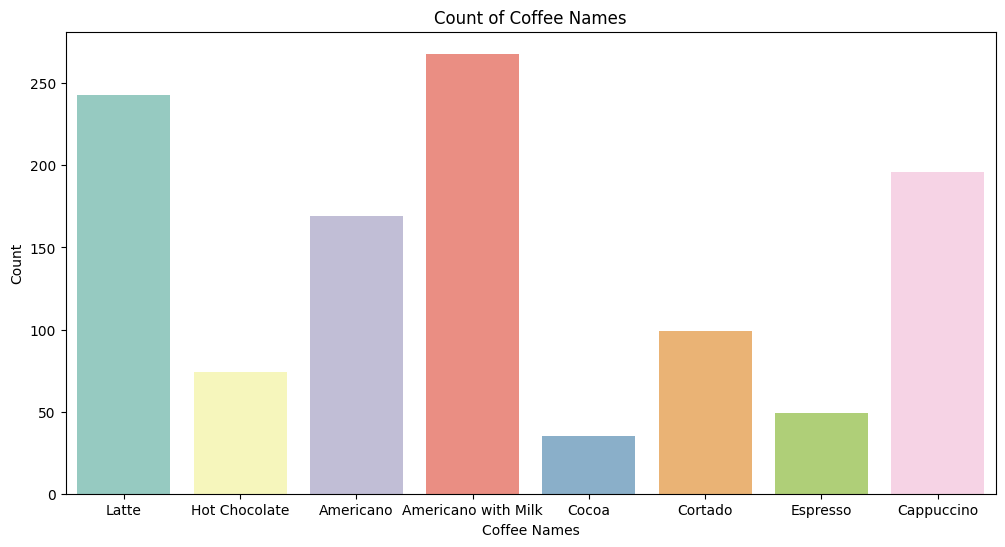

In [27]:
plt.figure(figsize=(12, 6))
sns.countplot(x='coffee_name', data=data, palette='Set3')
plt.xlabel('Coffee Names')
plt.ylabel('Count')
plt.title('Count of Coffee Names')
plt.show()


## observations:
top coffee sales:
    1. Americano with Milk
    2. latte
    3. cappuccino
    4. americano
    5. cortado
    6. Hot Chocolate
    7. Espresso
    8. Cocoa

In [28]:
coffee_sales = data.groupby('coffee_name')['money'].count().reset_index()
coffee_sales.rename(columns={'money': 'quantity_sold'}, inplace=True)
coffee_sales

,coffee_name,quantity_sold
0,Americano,169
1,Americano with Milk,268
2,Cappuccino,196
3,Cocoa,35
4,Cortado,99
5,Espresso,49
6,Hot Chocolate,74
7,Latte,243


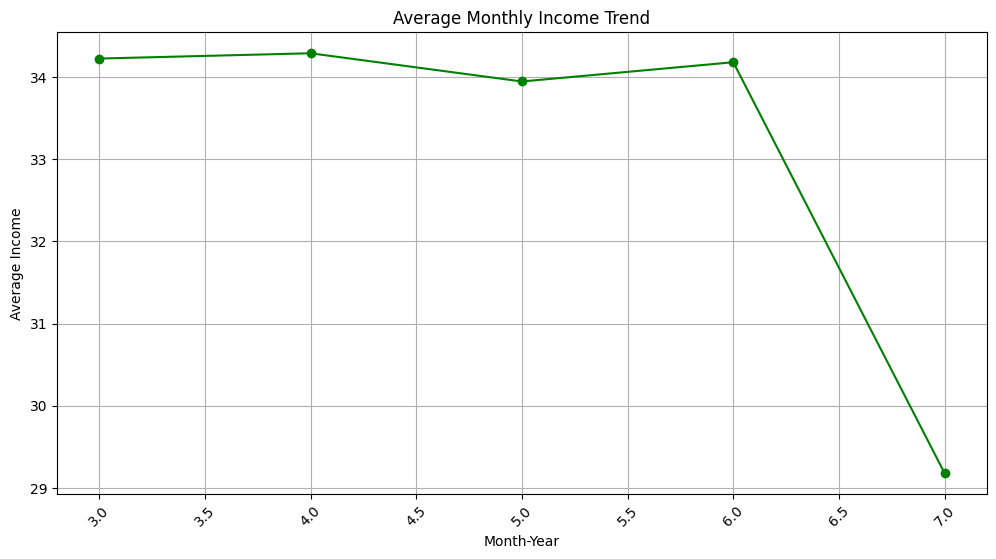

In [29]:
data['date'] = pd.to_datetime(data['date'])

# Extract month from the 'date' column
data['month'] = data['date'].dt.month
# Calculate the average monthly income
avg_monthly_income = data.groupby('month')['money'].mean().reset_index()
avg_monthly_income
# Plotting the average monthly income
plt.figure(figsize=(12, 6))
plt.plot(avg_monthly_income['month'], avg_monthly_income['money'], marker='o', color='g', linestyle='-')
plt.title('Average Monthly Income Trend')
plt.xlabel('Month-Year')
plt.ylabel('Average Income')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


## observations:
1. high income in 4th month 
2. low income in 7th month

In [30]:
data['date'] = pd.to_datetime(data['date'])

# Extract month and year from the 'date' column
data['month'] = data['date'].dt.month
# Group by 'month_year' and 'coffee_names' to count the number of sales for each coffee in each month
sales_per_coffee_per_month = data.groupby(['month', 'coffee_name']).size().reset_index(name='no_of_sales')

# Print the number of sales for each coffee in each month
sales_per_coffee_per_month

,month,coffee_name,no_of_sales
0,3,Americano,36
1,3,Americano with Milk,34
2,3,Cappuccino,20
3,3,Cocoa,6
4,3,Cortado,30
5,3,Espresso,10
6,3,Hot Chocolate,22
7,3,Latte,48
8,4,Americano,35
9,4,Americano with Milk,42


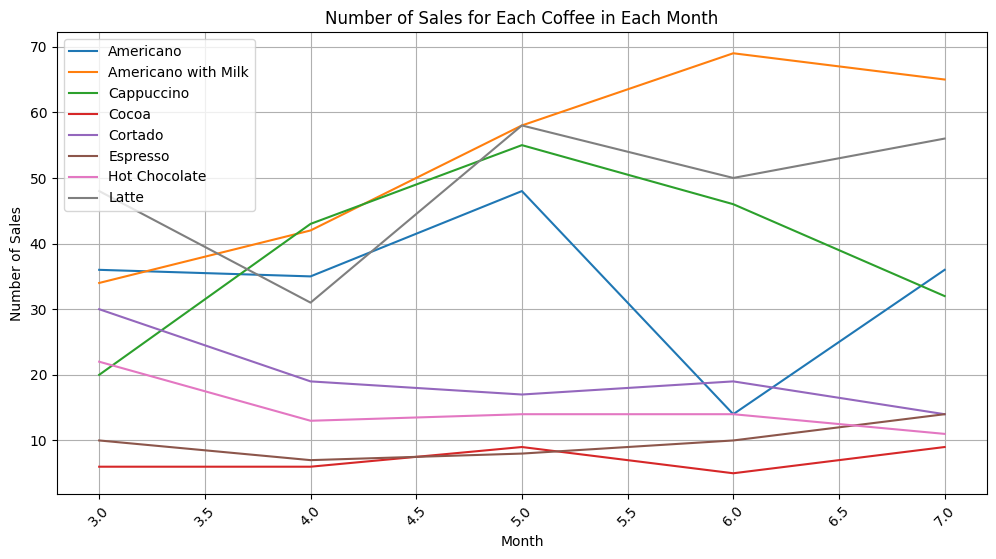

In [31]:
plt.figure(figsize=(12, 6))
for coffee in sales_per_coffee_per_month['coffee_name'].unique():
    data_to_plot = sales_per_coffee_per_month[sales_per_coffee_per_month['coffee_name'] == coffee]
    plt.plot(data_to_plot['month'], data_to_plot['no_of_sales'], label=coffee)

plt.title('Number of Sales for Each Coffee in Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [32]:
income_per_coffee_per_month = data.groupby(['month', 'coffee_name'])['money'].sum().reset_index()
income_per_coffee_per_month

,month,coffee_name,money
0,3,Americano,1044.80
1,3,Americano with Milk,1154.00
2,3,Cappuccino,780.50
3,3,Cocoa,232.20
4,3,Cortado,869.20
5,3,Espresso,241.00
6,3,Hot Chocolate,854.00
7,3,Latte,1874.50
8,4,Americano,1001.94
9,4,Americano with Milk,1407.74


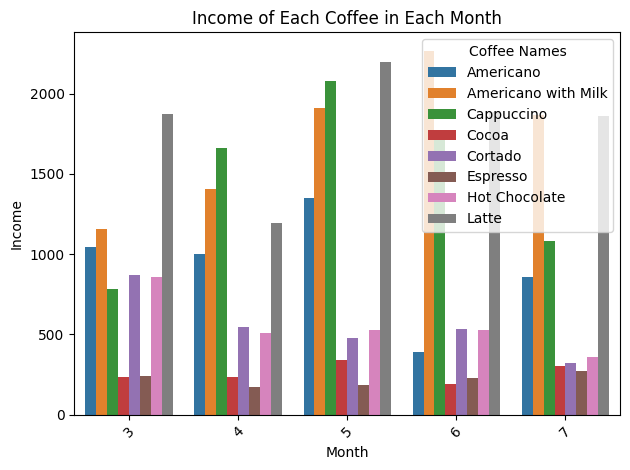

In [33]:

sns.barplot(x='month', y='money', hue='coffee_name', data=income_per_coffee_per_month)
plt.title('Income of Each Coffee in Each Month')
plt.xlabel('Month')
plt.ylabel('Income')
plt.xticks(rotation=45)
plt.legend(title='Coffee Names', loc='upper right')
plt.tight_layout()

plt.show()

## observations:
3rd month-> highest sale-"Latte",lowest sale -"Cocoa"
4rd month-> highest sale-"Cappuccino",lowest sale -"Espresso"
5rd month-> highest sale-"Latte",lowest sale -"Espresso"
6rd month-> highest sale-"Americano with Milk",lowest sale -"Cocoa"
7rd month-> highest sale-"Americano with Milk",lowest sale -"Espresso"

In [34]:
total_income_per_coffee = data.groupby('coffee_name')['money'].sum().reset_index()
total_income_per_coffee

,coffee_name,money
0,Americano,4644.54
1,Americano with Milk,8601.94
2,Cappuccino,7333.14
3,Cocoa,1295.94
4,Cortado,2745.08
5,Espresso,1100.62
6,Hot Chocolate,2778.48
7,Latte,9009.14


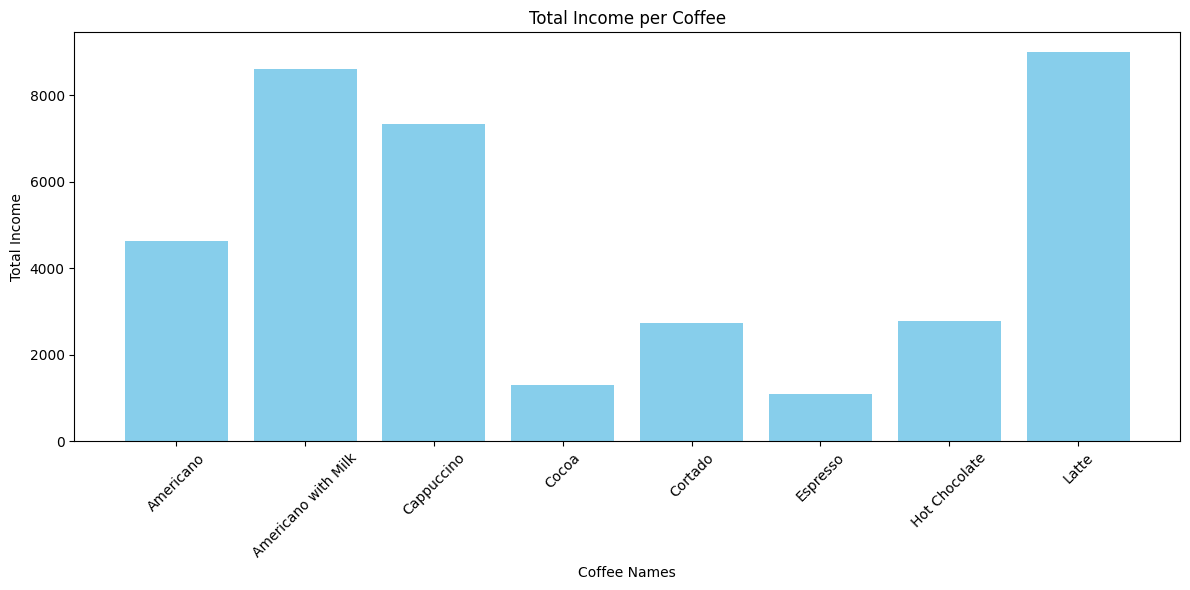

In [35]:
plt.figure(figsize=(12, 6))
plt.bar(total_income_per_coffee['coffee_name'], total_income_per_coffee['money'], color='skyblue')
plt.xlabel('Coffee Names')
plt.ylabel('Total Income')
plt.title('Total Income per Coffee')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

## observations:
higest income: Latte
lowest income: Espresso	

In [373]:
data['datetime'] = pd.to_datetime(data['datetime'], format='%Y-%m-%d %H:%M:%S.%f')

# Extract the hour from the datetime
data['hour'] = data['datetime'].dt.hour

# Group by 'coffee_names' and 'hour' to calculate the average sales for each coffee at each hour
sales_count_per_coffee_hour = data.groupby(['coffee_name', 'hour']).size().reset_index(name='sales_count')
sales_count_per_coffee_hour

,coffee_name,hour,sales_count
0,Americano,7,5
1,Americano,8,10
2,Americano,9,8
3,Americano,10,20
4,Americano,11,21
...,...,...,...
116,Latte,18,16
117,Latte,19,22
118,Latte,20,8
119,Latte,21,19


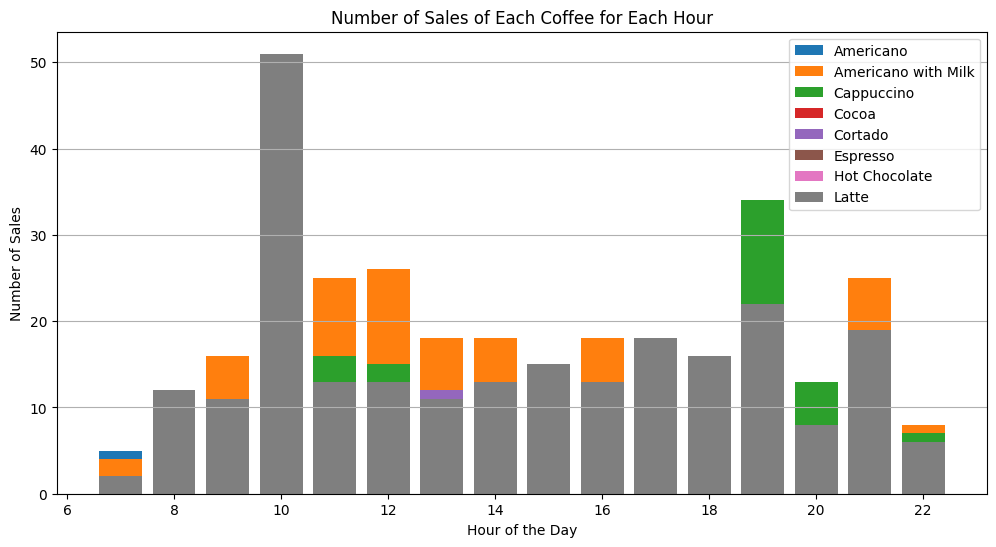

In [39]:
plt.figure(figsize=(12, 6))
for coffee, group in sales_count_per_coffee_hour.groupby('coffee_name'):
    plt.bar(group['hour'], group['sales_count'], label=coffee)

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Sales')
plt.title('Number of Sales of Each Coffee for Each Hour')
plt.legend()
plt.grid(axis='y')
plt.show()

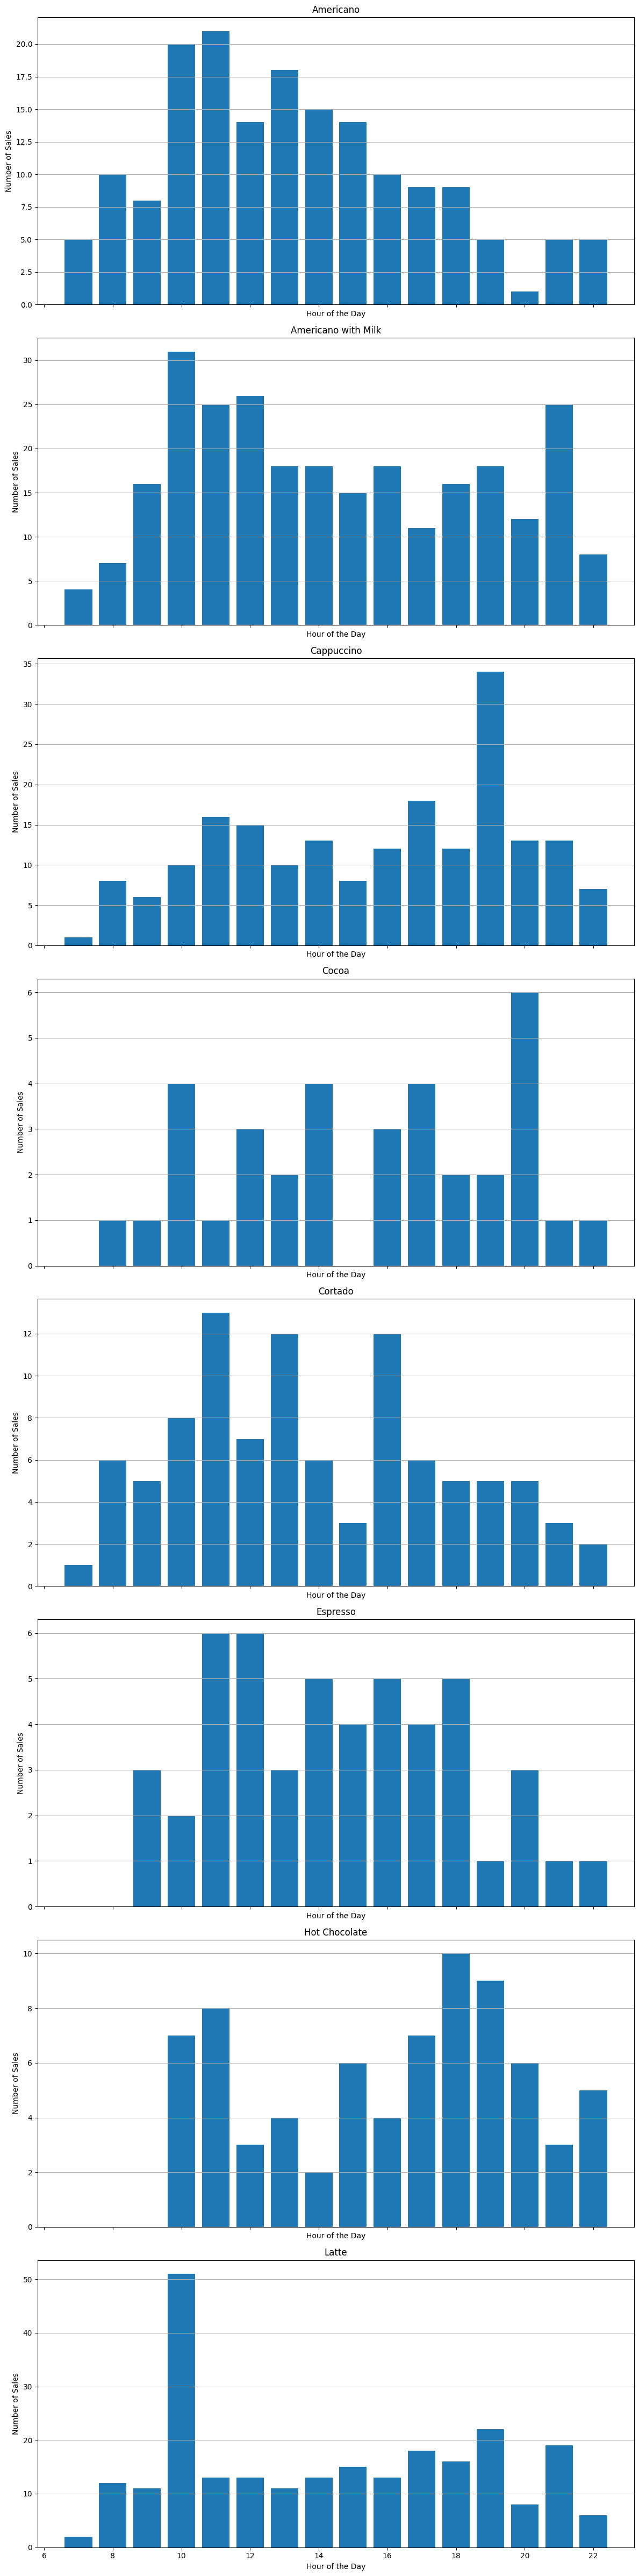

In [374]:
unique_coffees = sales_count_per_coffee_hour['coffee_name'].unique()

# Create subplots for each coffee type
fig, axs = plt.subplots(len(unique_coffees), 1, figsize=(12, 6*len(unique_coffees)), sharex=True)

for i, coffee in enumerate(unique_coffees):
    coffee_data = sales_count_per_coffee_hour[sales_count_per_coffee_hour['coffee_name'] == coffee]
    axs[i].bar(coffee_data['hour'], coffee_data['sales_count'])
    axs[i].set_title(coffee)
    axs[i].set_xlabel('Hour of the Day')
    axs[i].set_ylabel('Number of Sales')
    axs[i].grid(axis='y')

plt.tight_layout()
# plt.show()

## observations:
highest sales of coffes is around "10'O clock"
most saled coffee around 10'O clock is "Latte" 

In [375]:
data['day'] = data['date'].dt.dayofweek
data.head()

,date,datetime,cash_type,card,money,coffee_name,month,hour,day
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,3,10,4
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,3,12,4
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,3,12,4
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,3,13,4
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,3,13,4


In [30]:
coffees_sold_per_day = data.groupby(['month', 'day'])['coffee_name'].count()
coffees_sold_per_day

month  day
3      0      22
       1      33
       2      28
       3      28
       4      32
       5      40
       6      23
4      0      35
       1      30
       2      23
       3      24
       4      29
       5      27
       6      28
5      0      41
       1      42
       2      35
       3      52
       4      37
       5      24
       6      36
6      0      29
       1      31
       2      32
       3      33
       4      26
       5      36
       6      40
7      0      24
       1      49
       2      47
       3      27
       4      39
       5      27
       6      24
Name: coffee_name, dtype: int64

In [400]:
grouped_data = data.groupby(['month', 'day', 'coffee_name']).size().reset_index(name='count')

# Find the coffee that sold the most on each day of the week for each month
df = grouped_data.loc[grouped_data.groupby(['month', 'day'])['count'].idxmax()]

df=pd.DataFrame(max_coffe_sold, columns=['month', 'day','coffee_name'],index=None)
df.reset_index(drop=True, inplace=True)

most_sold_coffee_per_month = df.groupby('month')['coffee_name'].agg(lambda x: x.value_counts().idxmax())
df['most_sold_coffee_per_month'] = df['month'].map(most_sold_coffee_per_month)

# Calculate most sold coffee per day of the week
most_sold_coffee_per_day = df.groupby('day')['coffee_name'].agg(lambda x: x.value_counts().idxmax())
df['most_sold_coffee_per_day'] = df['day'].map(most_sold_coffee_per_day)
df

,month,day,coffee_name,most_sold_coffee_per_month,most_sold_coffee_per_day
0,3,0,Latte,Latte,Americano
1,3,1,Latte,Latte,Americano with Milk
2,3,2,Americano,Latte,Americano
3,3,3,Latte,Latte,Americano
4,3,4,Americano,Latte,Americano
5,3,5,Americano with Milk,Latte,Americano with Milk
6,3,6,Latte,Latte,Cappuccino
7,4,0,Americano with Milk,Americano with Milk,Americano
8,4,1,Americano with Milk,Americano with Milk,Americano with Milk
9,4,2,Americano with Milk,Americano with Milk,Americano


In [401]:
combined_values = pd.concat([df['coffee_name'], df['most_sold_coffee_per_month'], df['most_sold_coffee_per_day']]).unique()
le = LabelEncoder()
le.fit(combined_values)

# Transform all three columns using the same encoder
df['coffee_name'] = le.transform(df['coffee_name'])
df['most_sold_coffee_per_month'] = le.transform(df['most_sold_coffee_per_month'])
df['most_sold_coffee_per_day'] = le.transform(df['most_sold_coffee_per_day'])
df

,month,day,coffee_name,most_sold_coffee_per_month,most_sold_coffee_per_day
0,3,0,3,3,0
1,3,1,3,3,1
2,3,2,0,3,0
3,3,3,3,3,0
4,3,4,0,3,0
5,3,5,1,3,1
6,3,6,3,3,2
7,4,0,1,1,0
8,4,1,1,1,1
9,4,2,1,1,0


In [402]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [403]:
X = df[['month', 'day','most_sold_coffee_per_month','most_sold_coffee_per_day']]
y = df['coffee_name']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [404]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,100]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    }     
}

In [405]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.32,"{'C': 10, 'kernel': 'rbf'}"
1,random_forest,0.28,{'n_estimators': 5}
2,logistic_regression,0.20,{'C': 5}
3,naive_bayes_gaussian,0.41,{}
4,naive_bayes_multinomial,0.29,{}
5,decision_tree,0.32,{'criterion': 'entropy'}


In [406]:
from sklearn.model_selection import GridSearchCV

# Define a grid of parameters
param_grid = {
    'C': [0.1, 1, 10, 100],  # Increase range of C
    'gamma': [0.01, 0.1, 0.5, 1],  # Increase gamma
    'kernel': ['rbf']
}

grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, verbose=1)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [407]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [408]:
model = SVC(kernel='rbf', random_state=42, gamma=0.5, C=10)

model.fit(X_train_scaled, y_train)
model.score(X_test, y_test)


0.6363636363636364